# Time samples analysis

Read from file the samples:

In [44]:
file="time_optimized_0_1000"
f = open(file+".txt")
l=[]
for line in f:
    l.append([w for w in line.replace("\t", " ").replace("\n", "").split(" ") if w != ''])
f.close()
# l[:3]

In [45]:
l[0][0]

'10_0.000000_0.xml'

Convert the data to CSV (easier to pass them to pandas):

In [46]:
ll = []
i=0
while i<len(l):
    if "__" in l[i][0]:
        print(l[i])
        i+=1
    else:
        v, p, e = l[i][0][:-4].split("_")
        ll.append([int(v), float(p), int(e), 
                       float(l[i+2][1][:-1]), float(l[i+3][1][:-1]), float(l[i+4][1][:-1]), float(l[i+5][1][:-1]),
                       int(l[i+6][1]), int(l[i+7][1])])
        i+=8
ll[1000]

[100, 0.091919, 874, 9e-06, 9e-06, 1.1e-05, 1.6e-05, 1, 1]

In [47]:
import csv
f = open(file+".csv", "w")
f.write("vertices,percentage,edges,tarjan,nuutila,pearce,pearceNR,components,correct\n")
w = csv.writer(f)
w.writerows(ll)
f.close()

# Load samples with pandas: 

In [48]:
import pandas as pd
t = pd.read_csv(file+".csv")
print ("Number of samples : ",t.count())
print("Incorrect results : ", t.correct[t.correct==0].count())

Number of samples :  vertices      29997
percentage    29997
edges         29997
tarjan        29997
nuutila       29997
pearce        29997
pearceNR      29997
components    29997
correct       29997
dtype: int64
Incorrect results :  0


In [49]:
t.describe()

,vertices,percentage,edges,tarjan,nuutila,pearce,pearceNR,components,correct
count,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.0
mean,506.868687,0.089201,488.939094,0.000029,0.000023,0.000018,0.000040,447.016502,1.0
std,289.517291,0.663596,289.680187,0.000025,0.000029,0.000020,0.000044,333.775012,0.0
min,10.000000,0.000000,0.000000,0.000001,0.000001,0.000001,0.000001,1.000000,1.0
25%,250.000000,0.000727,240.000000,0.000017,0.000013,0.000010,0.000023,100.000000,1.0
50%,510.000000,0.001716,488.000000,0.000028,0.000021,0.000017,0.000036,460.000000,1.0
75%,760.000000,0.006799,739.000000,0.000039,0.000030,0.000025,0.000051,747.000000,1.0
max,1000.000000,11.111111,1002.000000,0.002277,0.003535,0.002781,0.005354,1000.000000,1.0


### Remove outliers above the 99-th percentile for all the algorithms:

In [50]:
for alg in ["tarjan","nuutila","pearce", "pearceNR"]:
    qt1=t[alg].quantile(0.99)
    print(alg, qt1)
    t = t[t[alg]<qt1]

tarjan 7.099999999999999e-05
nuutila 5.1e-05
pearce 4.1e-05
pearceNR 0.00010002000000000044


### Average samples with same number of vertices and edges:

In [51]:
t= t[["vertices","edges","tarjan","nuutila", "pearce", "pearceNR"]].groupby(by=["vertices","edges"], as_index=False).mean()
t["v+e"]=t["vertices"]+t["edges"]

In [52]:
t.describe()

,vertices,edges,tarjan,nuutila,pearce,pearceNR,v+e
count,9909.000000,9909.000000,9909.000000,9909.000000,9909.000000,9909.000000,9909.000000
mean,511.267535,492.134020,0.000029,0.000022,0.000018,0.000037,1003.401554
std,286.948903,288.797343,0.000014,0.000010,0.000008,0.000017,415.917509
min,10.000000,0.000000,0.000002,0.000001,0.000001,0.000002,10.000000
25%,260.000000,240.000000,0.000018,0.000013,0.000011,0.000024,700.000000
50%,510.000000,490.000000,0.000028,0.000021,0.000017,0.000037,1008.000000
75%,760.000000,740.000000,0.000039,0.000030,0.000025,0.000050,1309.000000
max,1000.000000,1002.000000,0.000069,0.000048,0.000040,0.000097,2000.000000


# Plots
### In (V+E,t) space averaging 10 samples:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0312e27ef0>,
      dtype=object)

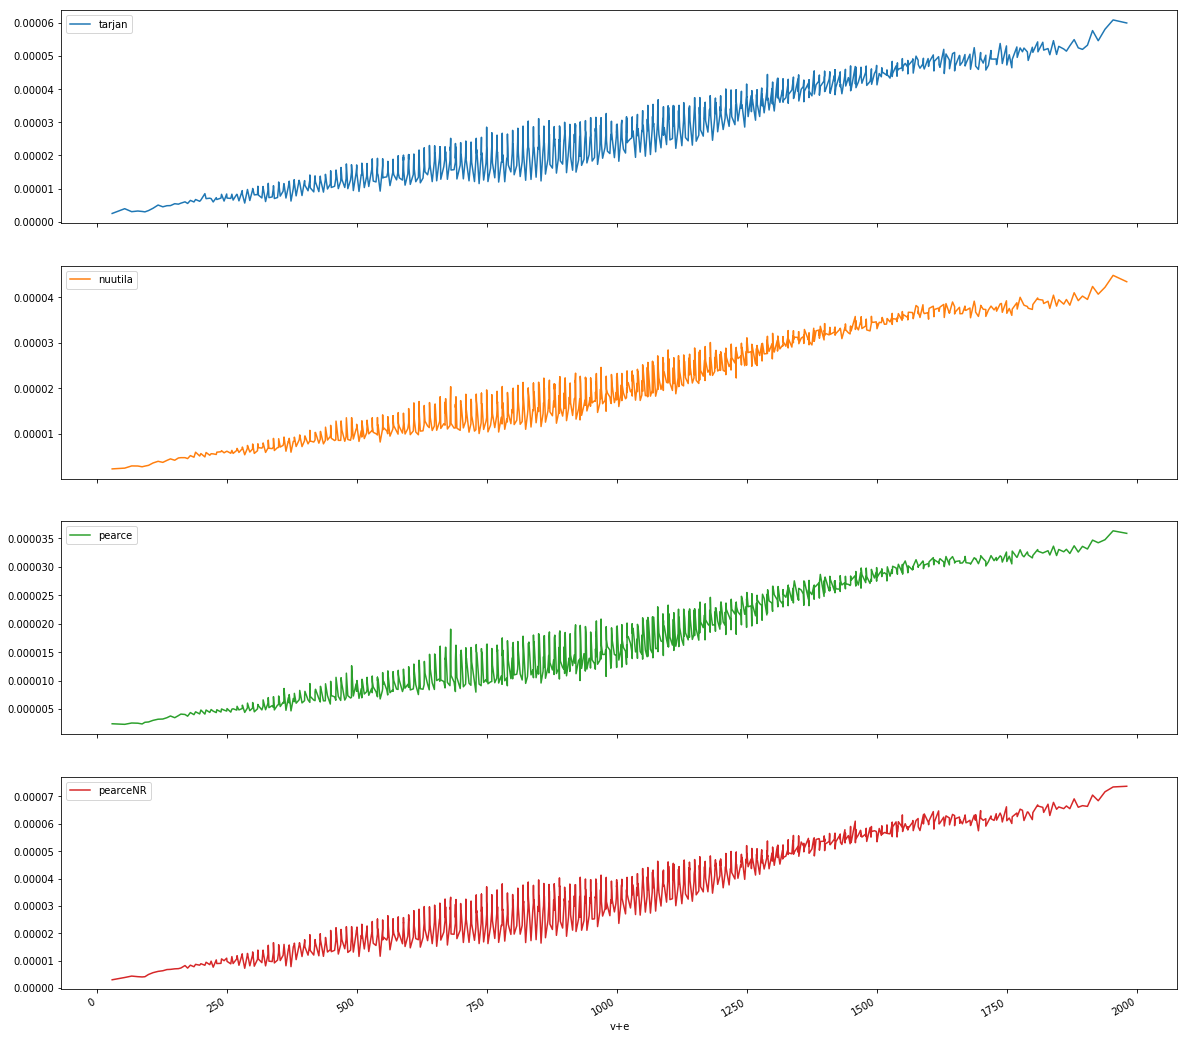

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
t = t.sort_values(by=["v+e","edges","vertices"])
t.groupby(np.arange(len(t))//10).mean().plot(x="v+e", y=["tarjan","nuutila","pearce", "pearceNR"],figsize=(20,20), subplots=True)

### In (V+E,t) space averaging 100 samples:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0312cc7240>,
      dtype=object)

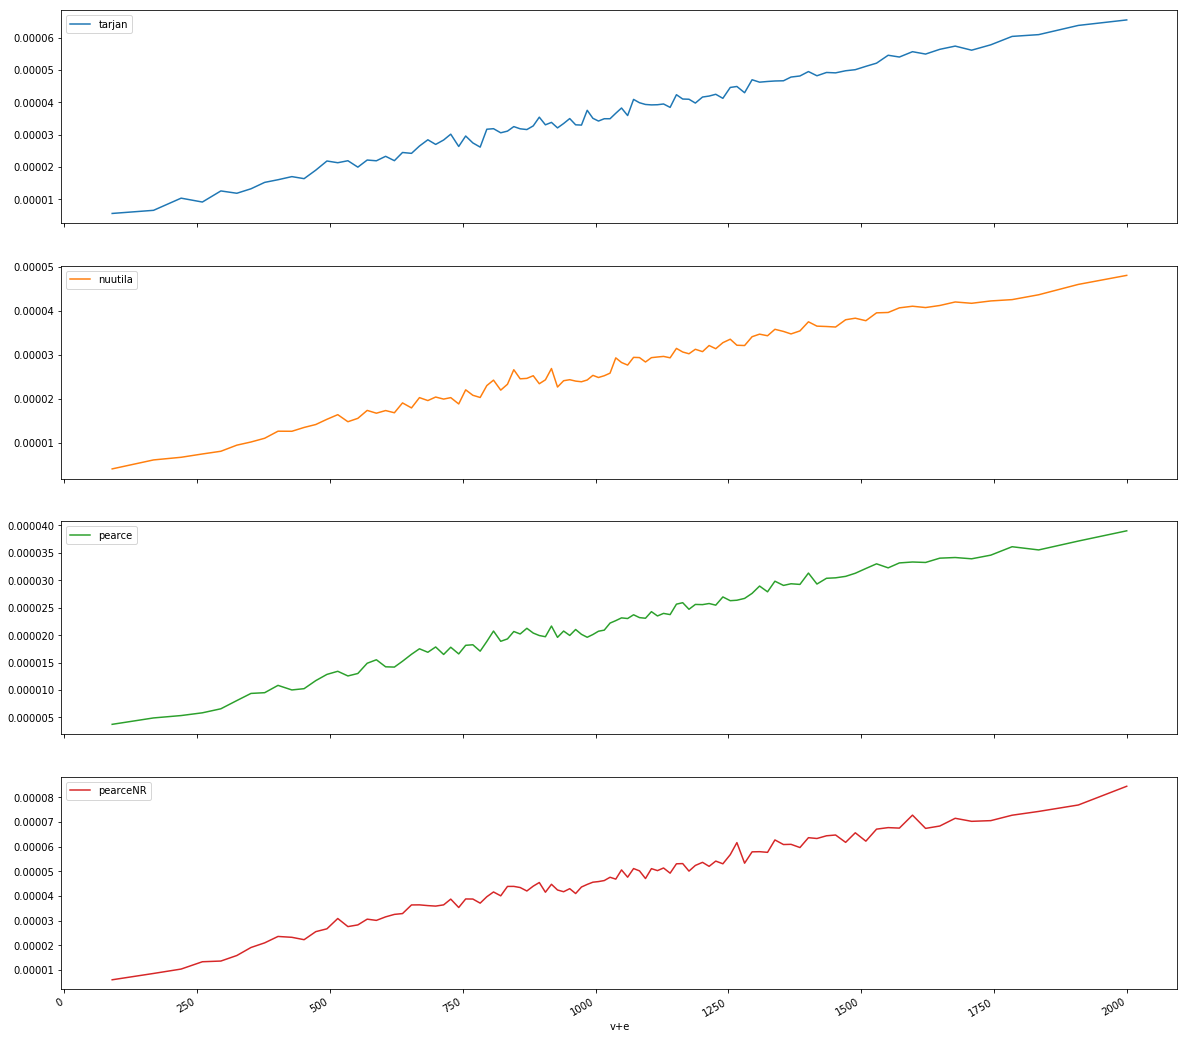

In [54]:
t.groupby(np.arange(len(t))//10).max().groupby(np.arange(len(t)/10)//10).mean().plot(x="v+e", y=["tarjan","nuutila","pearce", "pearceNR"],figsize=(20,20), subplots=True)

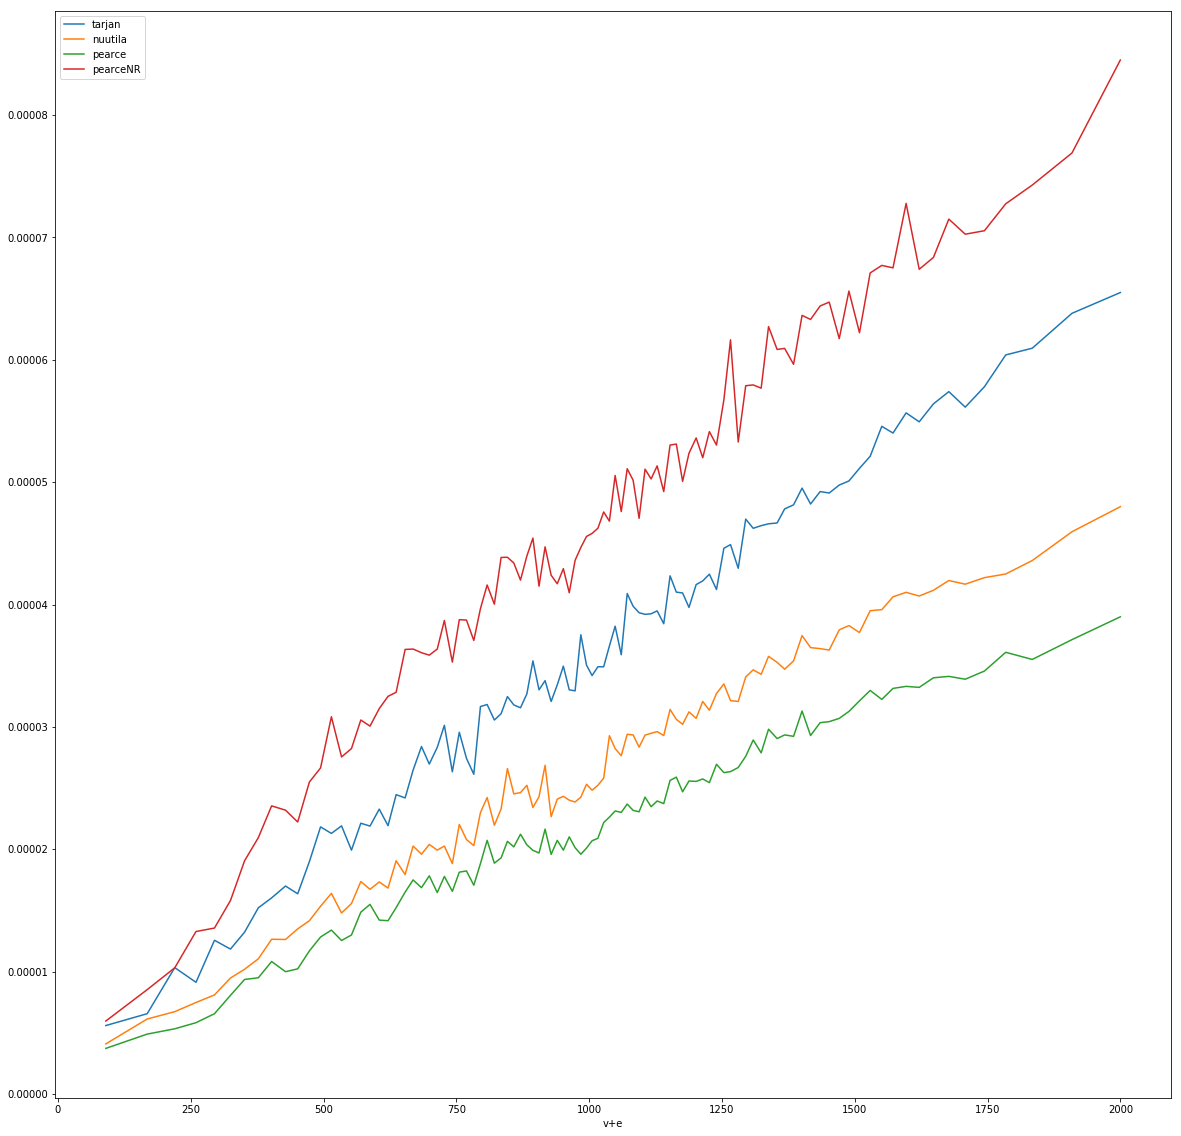

In [55]:
t.groupby(np.arange(len(t))//10).max().groupby(np.arange(len(t)/10)//10).mean().plot(x="v+e", y=["tarjan","nuutila","pearce", "pearceNR"],figsize=(20,20), subplots=False)

In [56]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly

import pandas as pd
df = t
plotly.tools.set_credentials_file(username='pscorso93', api_key='K4XqlXUNVsiWVSEtsFEZ')

# Plots in (V,E,t) space:
## Tarjan:

In [57]:
import plotly.plotly as py
import plotly
import plotly.graph_objs as go
from scipy.interpolate import griddata
x1 = np.linspace(t['vertices'].min(), t['vertices'].max(), len(t['vertices'].unique()))
y1 = np.linspace(t['edges'].min(), t['edges'].max(), len(t['edges'].unique()))

x2, y2 = np.meshgrid(x1, y1)
z2 = griddata((df['vertices'], df['edges']), df['tarjan'], (x2, y2), method='cubic')

data = [
    go.Surface(
        x=x2,
        y=y2,
        z=z2
    )
]

layout = go.Layout(
    title='Tarjan',
    autosize=False,
    width=1000,
    height=1000,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)

fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(data, filename='tarjan.html')
py.iplot(fig, filename='elevations-3d-surface')

## Nuutila:

In [58]:
x1 = np.linspace(t['vertices'].min(), t['vertices'].max(), len(t['vertices'].unique()))
y1 = np.linspace(t['edges'].min(), t['edges'].max(), len(t['edges'].unique()))

x2, y2 = np.meshgrid(x1, y1)
z2 = griddata((df['vertices'], df['edges']), df['nuutila'], (x2, y2), method='cubic')

data = [
    go.Surface(
        x=x2,
        y=y2,
        z=z2
    )
]

layout = go.Layout(
    title='Nuutila',
    autosize=False,
    width=1000,
    height=1000,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)

fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(data, filename='nuutila.html')
py.iplot(fig, filename='elevations-3d-surface')

## Pearce:

In [59]:
x1 = np.linspace(t['vertices'].min(), t['vertices'].max(), len(t['vertices'].unique()))
y1 = np.linspace(t['edges'].min(), t['edges'].max(), len(t['edges'].unique()))

x2, y2 = np.meshgrid(x1, y1)
z2 = griddata((df['vertices'], df['edges']), df['pearce'], (x2, y2), method='cubic')

data = [
    go.Surface(
        x=x2,
        y=y2,
        z=z2
    )
]

layout = go.Layout(
    title='Pearce',
    autosize=False,
    width=1000,
    height=1000,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)

fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(data, filename='pearce.html')

py.iplot(fig, filename='elevations-3d-surface')



In [60]:
x1 = np.linspace(t['vertices'].min(), t['vertices'].max(), len(t['vertices'].unique()))
y1 = np.linspace(t['edges'].min(), t['edges'].max(), len(t['edges'].unique()))

x2, y2 = np.meshgrid(x1, y1)
z2 = griddata((df['vertices'], df['edges']), df['pearceNR'], (x2, y2), method='cubic')

data = [
    go.Surface(
        x=x2,
        y=y2,
        z=z2
    )
]

layout = go.Layout(
    title='PearceNR',
    autosize=False,
    width=1000,
    height=1000,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)

fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(data, filename='pearceNR.html')

py.iplot(fig, filename='elevations-3d-surface')